### Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Atur dataset

In [2]:
dataset_path = '../../data/raw'

# Augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # brightness_range=[0.5, 1.5],
    validation_split=0.2
)

# Untuk training dan validasi
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 873 images belonging to 6 classes.
Found 216 images belonging to 6 classes.


### Bangun model

In [3]:
# Buat model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

### Compile model

In [4]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train model

In [5]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator
)

Epoch 1/50


28/28 [==============================] - 15s 480ms/step - loss: 1.7440 - accuracy: 0.2658 - val_loss: 1.6022 - val_accuracy: 0.4028
Epoch 2/50
28/28 [==============================] - 12s 416ms/step - loss: 1.4558 - accuracy: 0.4559 - val_loss: 1.4629 - val_accuracy: 0.4676
Epoch 3/50
28/28 [==============================] - 12s 413ms/step - loss: 1.2018 - accuracy: 0.5659 - val_loss: 1.3779 - val_accuracy: 0.5093
Epoch 4/50
28/28 [==============================] - 12s 417ms/step - loss: 1.0078 - accuracy: 0.6472 - val_loss: 1.2609 - val_accuracy: 0.5602
Epoch 5/50
28/28 [==============================] - 12s 419ms/step - loss: 0.9422 - accuracy: 0.6621 - val_loss: 1.2894 - val_accuracy: 0.5602
Epoch 6/50
28/28 [==============================] - 12s 419ms/step - loss: 0.8831 - accuracy: 0.6930 - val_loss: 1.1865 - val_accuracy: 0.5972
Epoch 7/50
28/28 [==============================] - 12s 432ms/step - loss: 0.8032 - accuracy: 0.7159 - val_loss: 1.2382 - val_accuracy: 0.60

### Visualisasi

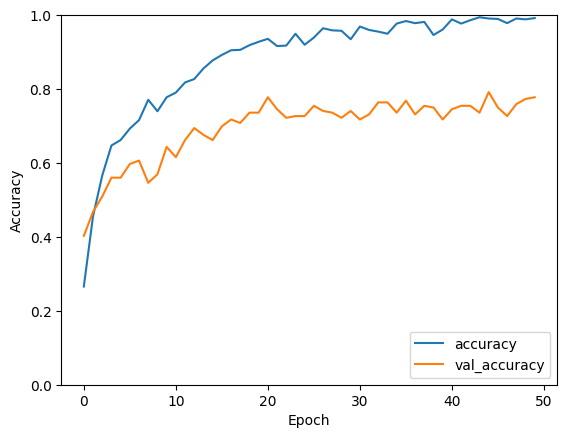

In [6]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Save ke TFlite

In [7]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\62813\AppData\Local\Temp\tmpywk_g1bf\assets


INFO:tensorflow:Assets written to: C:\Users\62813\AppData\Local\Temp\tmpywk_g1bf\assets
